# Logistic Regression:One verses rest strategy

In [35]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

data = load_iris()


df =pd.DataFrame(data.data, columns = data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [36]:
y = data.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
lr = LogisticRegression(C=5.0, solver="sag", max_iter=1000, tol=0.001)
lr.fit(df,y)

C:\Users\Kashmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.001, verbose=0,
                   warm_start=False)

In [38]:
lr.score(df,y)

0.9733333333333334

In [39]:
lr.predict([[5.1,3.5,1.4,0.2]])

array([0])

# New function

In [40]:
def plot_boundaries(df, y, est=None, xlbl="", ylbl="", t=""):
    
    x_min, x_max = df.values[:, 0].min() - 1, df.values[:, 0].max() + 1
    y_min, y_max = df.values[:, 1].min() - 1, df.values[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 1, 1)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(df.values[:, 0], df.values[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xlim(xx.min(), xx.max())
    plt.title(t)
    plt.show()

In [41]:
df2 = df.drop(["sepal width (cm)","petal width (cm)"], axis=1)

In [42]:
df2.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [51]:
lr = LogisticRegression(C=5.0, solver="sag", max_iter=1000, tol=0.001)
lr.fit(df2,y)

C:\Users\Kashmiri\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.001, verbose=0,
                   warm_start=False)

In [52]:
lr.coef_

array([[ 1.92323857, -4.19192137],
       [-0.96473602,  0.67104571],
       [-3.35223517,  5.08819882]])

In [53]:
lr.intercept_

array([ 1.02906152,  2.35268391, -3.92066424])

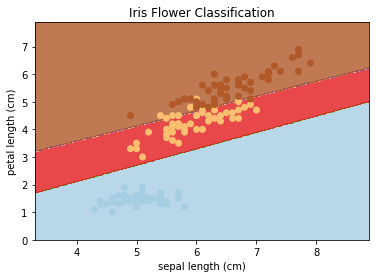

In [54]:
plot_boundaries(df2, y, est=lr, xlbl="sepal length (cm)", ylbl="petal length (cm)",t="Iris Flower Classification")

# Fruit data set

In [144]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

tb=pd.read_table('fruit.txt')
tb
y=tb["fruit_name"]
y

0        apple
1        apple
2        apple
3     mandarin
4     mandarin
5     mandarin
6     mandarin
7     mandarin
8        apple
9        apple
10       apple
11       apple
12       apple
13       apple
14       apple
15       apple
16       apple
17       apple
18       apple
19       apple
20       apple
21       apple
22       apple
23       apple
24      orange
25      orange
26      orange
27      orange
28      orange
29      orange
30      orange
31      orange
32      orange
33      orange
34      orange
35      orange
36      orange
37      orange
38      orange
39      orange
40      orange
41      orange
42      orange
43       lemon
44       lemon
45       lemon
46       lemon
47       lemon
48       lemon
49       lemon
50       lemon
51       lemon
52       lemon
53       lemon
54       lemon
55       lemon
56       lemon
57       lemon
58       lemon
Name: fruit_name, dtype: object

In [145]:
tb

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [146]:
tb2= tb.drop(["fruit_name","fruit_subtype"], axis=1)
tb2

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


In [171]:
def plot_boundaries(df, y, est=None, xlbl="", ylbl="", t=""):
    
    x_min, x_max = df.values[:, 0].min() - 1, df.values[:, 0].max() + 1
    y_min, y_max = df.values[:, 1].min() - 1, df.values[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = est.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    plt.subplot(1, 1, 1)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    plt.scatter(df.values[:, 0], df.values[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    plt.xlim(xx.min(), xx.max())
    plt.title(t)
    plt.show()
    
lr = LogisticRegression(C=5.0, solver="sag",multi_class='ovr', max_iter=1000, tol=0.01)
lr.fit(tb2,y)

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.01, verbose=0,
                   warm_start=False)

In [168]:
lr.coef_

array([[-0.08858337, -0.00153689,  0.00449415, -0.03233217, -0.0009045 ],
       [ 0.06530679, -0.00946217, -0.01849241,  0.06228556, -0.00203975],
       [ 0.00583025, -0.02134028,  0.02735167,  0.00029295,  0.00487038],
       [-0.0025069 ,  0.00226009, -0.04858798, -0.06427255, -0.00749408]])

In [169]:
lr.intercept_

array([-2.60675336e-03,  6.23436643e-05,  5.74434716e-03, -1.03275047e-02])

In [177]:
lr.predict([[3,142,7.6,7.8,0.75]])

array(['orange'], dtype=object)

In [166]:
lr.score(tb2,y)*100

79.66101694915254

# Nearest Neighbour/K-NN(Lazy Learning Algorithm)

In [178]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

tb=pd.read_table('fruit.txt')

y=tb["fruit_name"]

tb2= tb.drop(["fruit_name","fruit_subtype"], axis=1)
tb2

,fruit_label,mass,width,height,color_score
0,1,192,8.4,7.3,0.55
1,1,180,8.0,6.8,0.59
2,1,176,7.4,7.2,0.60
3,2,86,6.2,4.7,0.80
4,2,84,6.0,4.6,0.79
5,2,80,5.8,4.3,0.77
6,2,80,5.9,4.3,0.81
7,2,76,5.8,4.0,0.81
8,1,178,7.1,7.8,0.92
9,1,172,7.4,7.0,0.89


In [185]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(tb2, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [186]:
neigh.predict([[3,142,7.6,7.8,0.75]])

array(['orange'], dtype=object)

In [189]:
neigh.score(tb2,y)*100

83.05084745762711

In [190]:
 print(neigh.predict_proba([[3,142,7.6,7.8,0.75]]))

[[0. 0. 0. 1.]]


# Naive Baye's Algorithm

In [ ]:
Gaussian probability function used for continuous data

# Classification

In [200]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB

data = pd.read_csv("wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [201]:
y = data["quality"]
y.head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [214]:
x= data.drop(["quality"], axis=1)
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [210]:
gnb = GaussianNB()
gnb.fit(x,y)
print(gnb.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]))
print(str(gnb.score(x,y)*100),"% Accuracy")

[5]
56.47279549718574 % Accuracy


In [212]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x, y)
print(neigh.predict([[7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4]]))
print(str(neigh.score(x,y)*100),"% Accuracy")

[5]
75.54721701063164 % Accuracy
